In [1]:
import env
import os
import acquire
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [2]:
df_iris = data('iris')

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(df_iris['Species'].unique())

['setosa' 'versicolor' 'virginica']


### 5. Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [9]:
goog_sheet = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = goog_sheet.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url,index_col=0)
df_google

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
df_google.head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df_google.shape

(891, 11)

In [12]:
df_google.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_google.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [14]:
df_google.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(df_google['Sex'].unique())
print(df_google['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [16]:
df_excel = pd.read_excel('/Users/jer/Desktop/CodeUp-other/Data/train.xlsx')

In [17]:
df_excel_sample = df_excel.head(100)

In [18]:
# num rows
df_excel.shape[0]

891

In [19]:
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [20]:
df_excel.select_dtypes('O').columns
#df_excel.loc[:,df.dtypes=='O'].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [21]:
intrange = pd.DataFrame(df_excel.select_dtypes('int'))
intrange

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


### Make a new python module, acquire.py to hold the following data aquisition functions:

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [22]:
titanic_db = 'titanic_db.csv'
if os.path.exists(titanic_db):
    df = pd.read_csv(titanic_db, index_col=0)
else:
    df = acquire.get_titanic_data('titanic_db')
    df.to_csv(titanic_db, index=False)

2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [23]:
iris_db = 'iris_db.csv'
if os.path.exists(iris_db):
    df = pd.read_csv(iris_db, index_col=0)
else:
    df = acquire.get_iris_data('iris_db')
    df.to_csv(iris_db, index=False)

In [24]:
telco_db = 'telco_db.csv'
if os.path.exists(telco_db):
    df = pd.read_csv(telco_db, index_col=0)
else:
    df = acquire.get_telco_data('telco_churn')
    df.to_csv(telco_db, index=False)

### 1. Use the function defined in acquire.py to load the iris data.

In [25]:
iris = acquire.get_iris_data('iris_db')

In [26]:
iris

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
5,1,setosa,6,5.4,3.9,1.7,0.4
6,1,setosa,7,4.6,3.4,1.4,0.3
7,1,setosa,8,5.0,3.4,1.5,0.2
8,1,setosa,9,4.4,2.9,1.4,0.2
9,1,setosa,10,4.9,3.1,1.5,0.1


In [27]:
iris = iris.drop(columns=['species_id', 'measurement_id'])

In [28]:
iris = iris.rename(columns={'species_name':'species'})

In [29]:
iris_dummies = pd.get_dummies(iris['species']).astype('int')

In [30]:
iris = pd.concat([iris, iris_dummies], axis=1)

In [31]:
def prep_iris():
    '''
    Pulls and prepares iris data. Drops a few columns, alters name of 'species' column and adds an additional number
    value associated by species type.
    '''

    iris = acquire.get_iris_data('iris_db')
    iris = iris.drop(columns=['species_id', 'measurement_id'])
    iris = iris.rename(columns={'species_name':'species'})
    iris_dummies = pd.get_dummies(iris['species']).astype('int')
    iris = pd.concat([iris, iris_dummies], axis=1)
    return iris

### 1. Use the function defined in acquire.py to load the Titanic data.
2. Drop any unnecessary, unhelpful, or duplicated columns.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [32]:
titanic = acquire.get_titanic_data('titanic_db')

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [34]:
# drop deck, embark_town, class
titanic = titanic.drop(columns=['class','embark_town','deck'])

In [35]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,1,female,38.0,1,0,71.2833,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,1
3,3,1,1,female,35.0,1,0,53.1000,S,0
4,4,0,3,male,35.0,0,0,8.0500,S,1


In [36]:
dummy_sex = pd.get_dummies(titanic['sex'], drop_first=True).astype(int)

In [37]:
dummy_embarked = pd.get_dummies(titanic[['embarked']]).astype(int)

In [38]:
dummy = pd.concat([dummy_sex,dummy_embarked], axis = 1)

In [39]:
titanic = pd.concat([titanic,dummy], axis=1)

In [40]:
def prep_titanic():
    '''
    Pulls data from mySql db and assigns as titanic.
    This function will drop duplicate columns and encode the rest of the categorical columns.
    '''
    titanic = acquire.get_titanic_data('titanic_db')
    titanic = titanic.drop(columns=['class','embark_town','deck'])
    dummy_sex = pd.get_dummies(titanic['sex'], drop_first=True).astype(int)
    dummy_embarked = pd.get_dummies(titanic[['embarked']]).astype(int)
    dummy = pd.concat([dummy_sex,dummy_embarked], axis = 1)
    titanic = pd.concat([titanic,dummy], axis=1)
    return titanic

Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [41]:
telco = acquire.get_telco_data('telco_churn')

In [42]:
# removing duplicate columns and rows
telco = telco.loc[:,~telco.columns.duplicated()].copy()
telco = telco.drop_duplicates()

In [43]:
pd.set_option('display.max_columns', None)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL,Mailed check,One year
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month


In [44]:
telco.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
internet_service_type        object
payment_type                 object
contract_type                object
dtype: object

In [45]:
def prep_telco(telco):
    '''
    Pulls data from mySql server and drops duplicate columns and values (keeps 1 of needed)
    encodes all categorical data and drops columns that are unnecessary as a by product of 
    new dummy columns.
    '''
    # pulling data from mysql using get_telco_data
    telco = telco.drop_duplicates()
    # removing duplicate columns
    telco = telco.loc[:,~telco.columns.duplicated()].copy()
    #encoding categorical type data
    dummy_df = pd.get_dummies(telco[['multiple_lines','online_security','online_backup','payment_type',
                                'contract_type', 'tech_support','streaming_tv','streaming_movies','device_protection']],dtype=int ,drop_first=True)

    telco['partner_binary'] = pd.get_dummies(telco['partner'], dtype=int, drop_first=True)
    telco['dependents_binary'] = pd.get_dummies(telco['dependents'], dtype=int,drop_first=True)
    telco['phone_service_binary'] = pd.get_dummies(telco['phone_service'], dtype=int, drop_first=True)
    telco['gender_binary'] = pd.get_dummies(telco['gender'], dtype=int, drop_first=True)
    telco['paperless_billing_binary'] = pd.get_dummies(telco['paperless_billing'], dtype=int, drop_first=True)
    telco['churn_binary'] = pd.get_dummies(telco['churn'], dtype=int, drop_first=True)
    telco = pd.concat([telco, dummy_df], axis=1)

    telco['total_charges'] = telco['total_charges'].str.replace(' ','0').astype('float')
    # dropping extra columns after encoding
    telco = telco.drop(columns=['online_security_No internet service',
                    'online_security_No internet service','online_backup_No internet service',
                    'tech_support_No internet service','streaming_tv_No internet service','streaming_movies_No internet service','device_protection_No internet service',
                    'tech_support','device_protection'])
    # 'multiple_lines','online_security', 'online_backup','streaming_tv','streaming_movies',
    return telco
    

In [46]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

def splitter(df,target='churn'):
    '''
    20% test, 80% train_validate
    then of the 80% train_validate: 30% validate, 70% train. 
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])

    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train[target])

    return train, test, validate


In [47]:
#iris split

train_iris, test_iris, validate_iris = splitter(iris,target='species')

print(f'train -> {train_iris.shape}')
print(f'validate -> {validate_iris.shape}')
print(f'test -> {test_iris.shape}')

train -> (84, 8)
validate -> (36, 8)
test -> (30, 8)


In [48]:
#titanic split

train_titanic, test_titanic, validate_titanic = splitter(titanic,target='survived')

print(f'train -> {train_titanic.shape}')
print(f'validate -> {validate_titanic.shape}')
print(f'test -> {test_titanic.shape}')

train -> (498, 14)
validate -> (214, 14)
test -> (179, 14)


In [49]:
# telco split

train_telco, test_telco, validate_telco = splitter(telco,target='churn')

print(f'train -> {train_telco.shape}')
print(f'validate -> {validate_telco.shape}')
print(f'test -> {test_telco.shape}')


train -> (3943, 24)
validate -> (1691, 24)
test -> (1409, 24)


### Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

#### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [50]:
train_iris.dtypes

species          object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
setosa            int64
versicolor        int64
virginica         int64
dtype: object

In [51]:
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


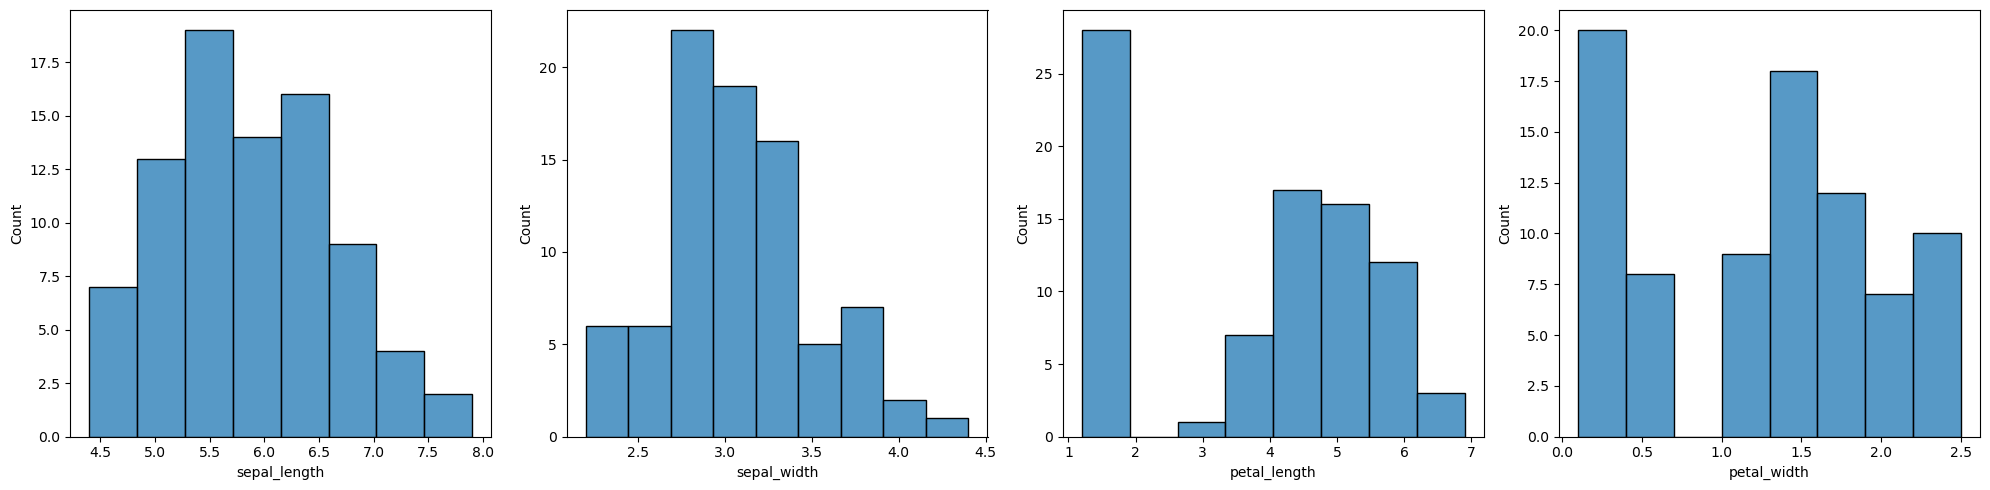

In [87]:
f, axes= plt.subplots(1,4)
plt.rcParams["figure.figsize"] = [20.00, 5]
plt.rcParams["figure.autolayout"] = False
sns.histplot(train_iris['sepal_length'], ax=axes[0])
sns.histplot(train_iris['sepal_width'], ax=axes[1])
sns.histplot(train_iris['petal_length'], ax=axes[2])
sns.histplot(train_iris['petal_width'], ax=axes[3])
plt.show()

<Axes: xlabel='species', ylabel='count'>

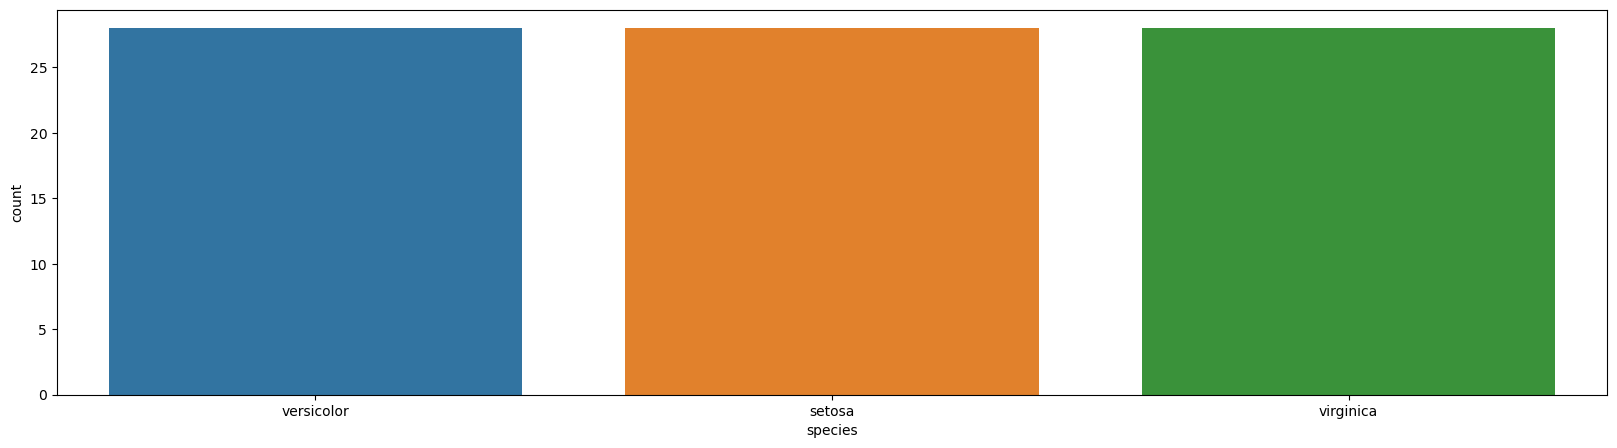

In [53]:
sns.countplot(data=train_iris,x='species')

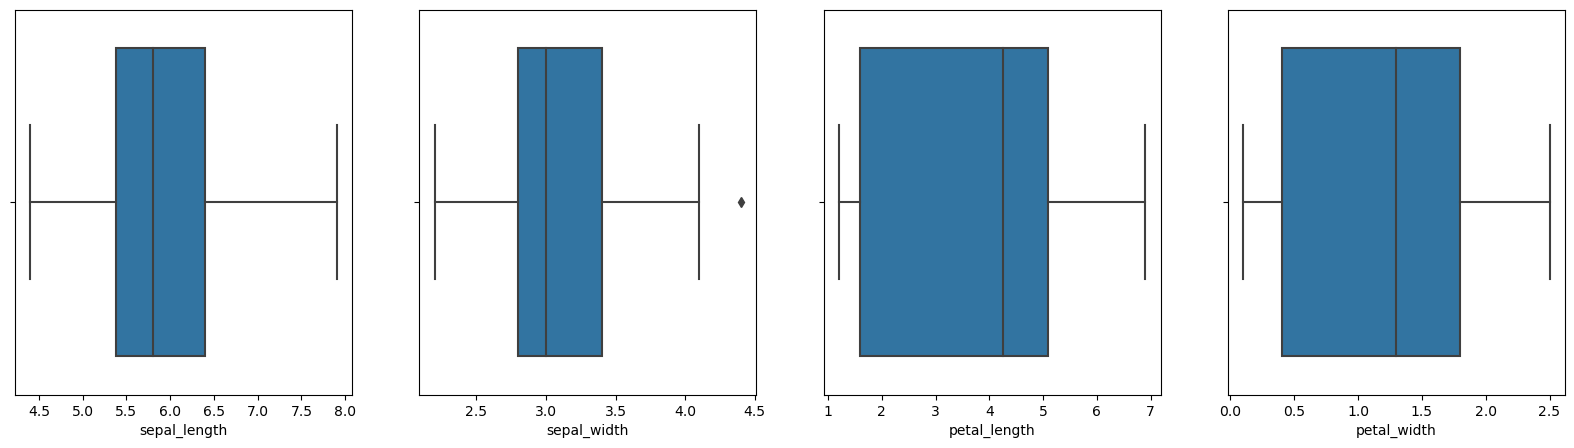

In [54]:
f, axes= plt.subplots(1,4)
plt.rcParams["figure.figsize"] = [20.00, 5]
plt.rcParams["figure.autolayout"] = False
sns.boxplot(data=train_iris, x= 'sepal_length', ax=axes[0])
sns.boxplot(data=train_iris, x='sepal_width', ax=axes[1])
sns.boxplot(data=train_iris, x='petal_length', ax=axes[2])
sns.boxplot(data=train_iris, x='petal_width', ax=axes[3])
plt.show()

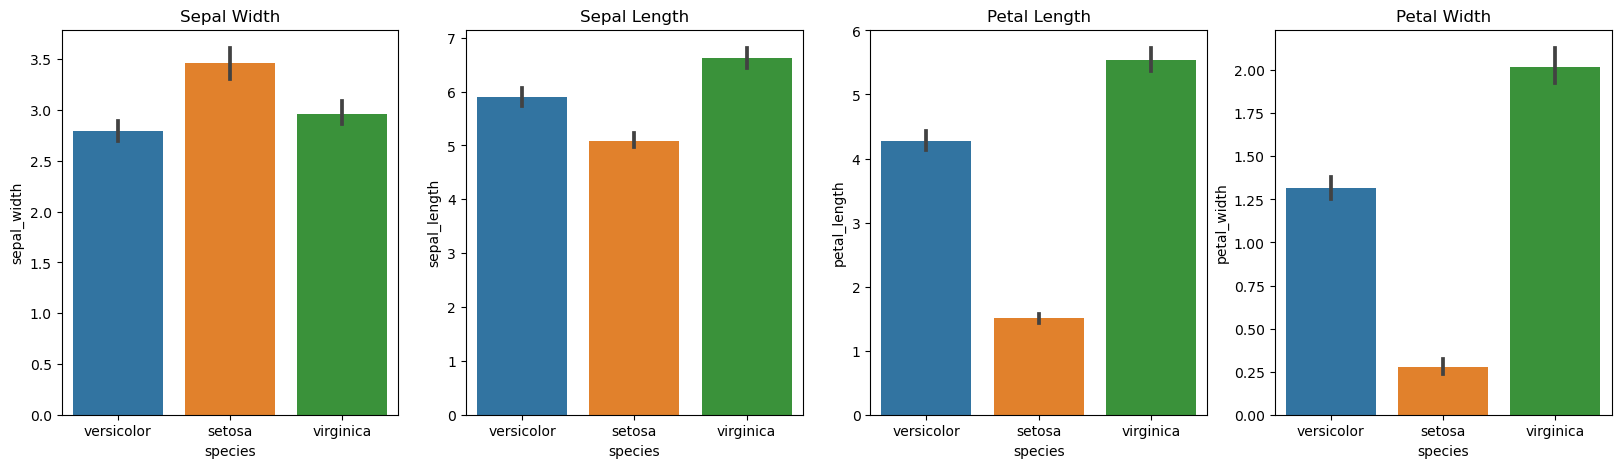

In [55]:
f, axes= plt.subplots(1,4)
plt.rcParams["figure.figsize"] = [20.00, 5]
plt.rcParams["figure.autolayout"] = False
ax0=sns.barplot(data=train_iris,x='species',y='sepal_width',estimator='mean',ax=axes[0])
ax0.title.set_text('Sepal Width')
ax1= sns.barplot(data=train_iris,x='species',y='sepal_length',ax=axes[1])
ax1.title.set_text('Sepal Length')
ax2 = sns.barplot(data=train_iris,x='species',y='petal_length',ax=axes[2])
ax2.title.set_text('Petal Length')
ax3 = sns.barplot(data=train_iris,x='species',y='petal_width',ax=axes[3])
ax3.title.set_text('Petal Width')
plt.show()

### Analysis of the iris data set would show that -
- the data collect of the 3 species; versicolor, setosa species and virginica are evenly distributed through the study.
- the distribution of both sepal length and width seem to be a normal distribution for all 3 species.
- petal length and width have a broad range of values and distributions are slightly skewed towards one side or another
- virginica features have a broader variety within all 4 features
- setosa petals could be identified by its predominately lower petal features
- distinguishing between virginica and versicolor features would be more difficult if only using data

#### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

<Axes: xlabel='virginica', ylabel='sepal_length'>

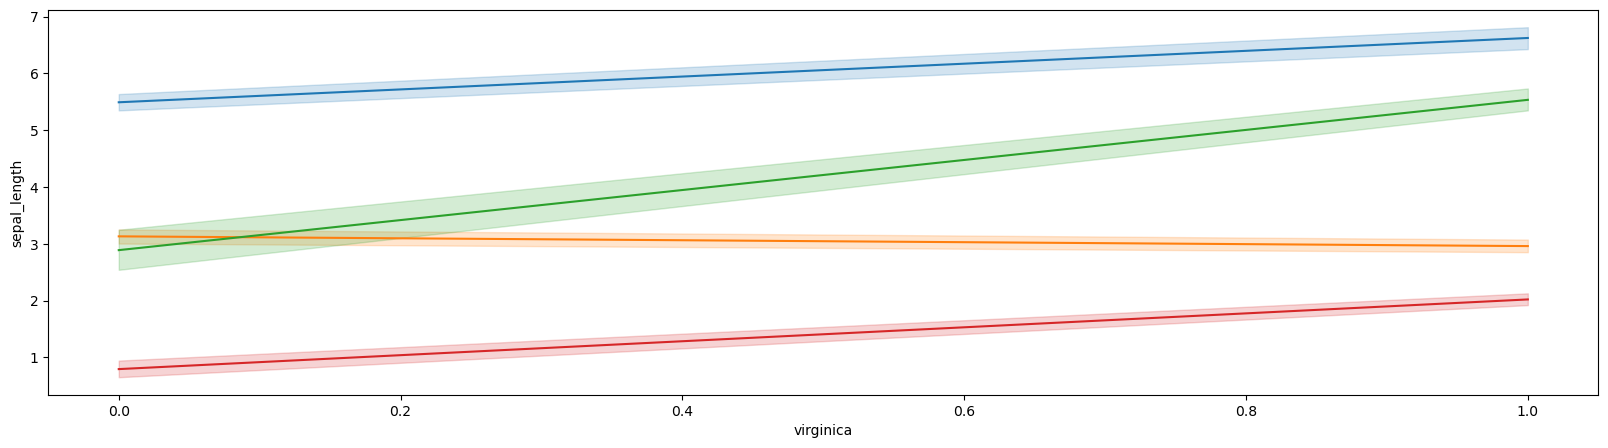

In [56]:
sns.lineplot(data=train_iris, x='virginica',y='sepal_length')
sns.lineplot(data=train_iris, x='virginica',y='sepal_width')
sns.lineplot(data=train_iris, x='virginica',y='petal_length')
sns.lineplot(data=train_iris, x='virginica',y='petal_width')

In [57]:
print(train_iris['virginica'].describe())
print(train_iris['versicolor'].describe())
train_iris['setosa'].describe()

count    84.000000
mean      0.333333
std       0.474236
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: virginica, dtype: float64
count    84.000000
mean      0.333333
std       0.474236
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: versicolor, dtype: float64


count    84.000000
mean      0.333333
std       0.474236
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: setosa, dtype: float64

In [58]:
print(train_iris.groupby('species')['petal_width'].mean())
# train_iris[train_iris['versicolor'] ]
virginica_mean = 1.314286
versicolor_mean = 2.021429

species
setosa        0.275000
versicolor    1.314286
virginica     2.021429
Name: petal_width, dtype: float64


In [59]:
virginica_petal_width = train_iris['petal_width'][train_iris['species'] == 'virginica']
versicolor_petal_width = train_iris['petal_width'][train_iris['species'] == 'versicolor']

Null $H_0$: The means of versicolor and virginica are petal width significantly different\
Null $H_a$: The means of versicolor and virginica are NOT petal width significantly different

In [60]:
_, p = stats.mannwhitneyu(x=versicolor_petal_width,y=virginica_petal_width)
α = .05
if p < α:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

We reject the null hypothesis


4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [61]:
train_iris['petal_width'][train_iris['species'] == 'virginica']
train_iris['petal_width'][train_iris['species'] == 'versicolor']

79    1.0
95    1.2
91    1.4
82    1.2
52    1.5
97    1.3
70    1.8
51    1.5
57    1.0
53    1.3
69    1.1
87    1.3
67    1.0
92    1.2
96    1.3
89    1.3
83    1.6
84    1.5
74    1.3
61    1.5
81    1.0
58    1.3
54    1.5
94    1.3
88    1.3
85    1.6
55    1.3
73    1.2
Name: petal_width, dtype: float64

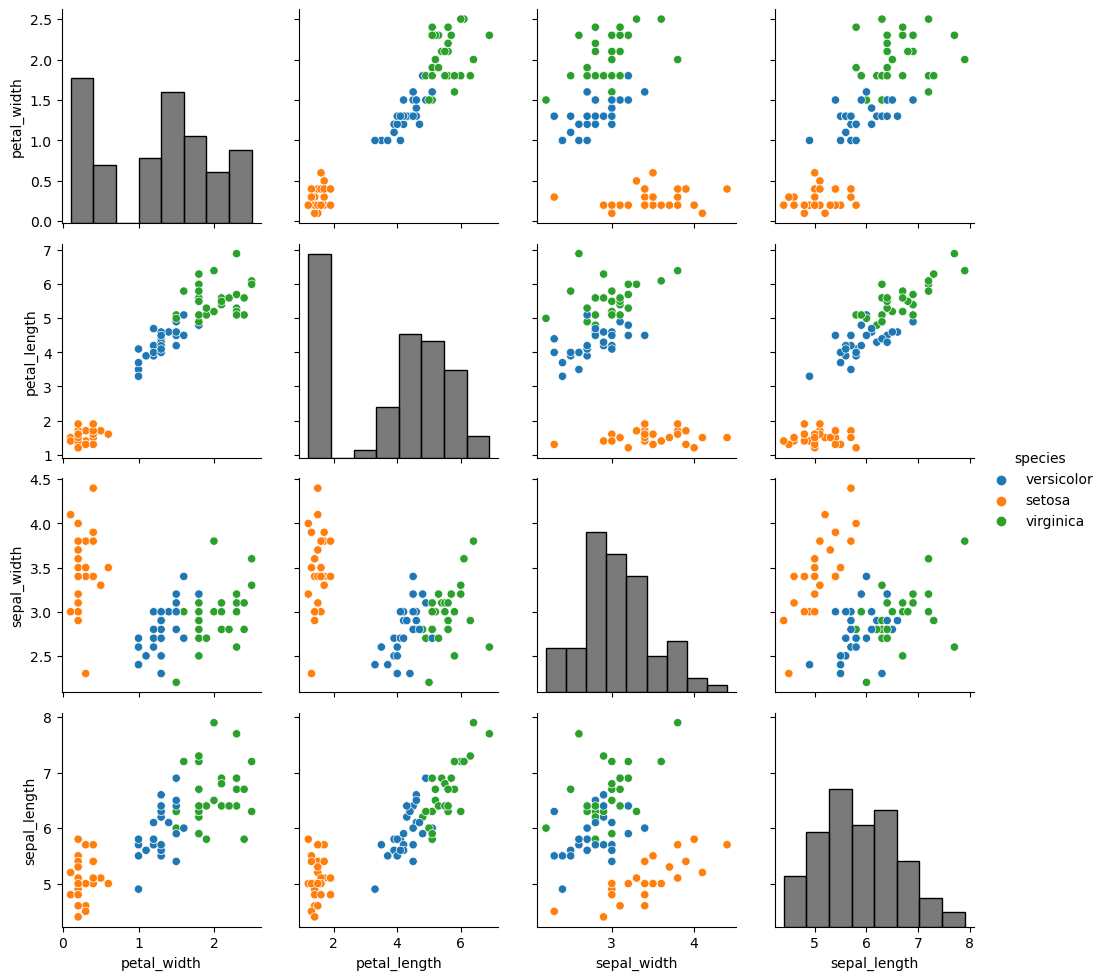

In [62]:
vars=['petal_width','petal_length','sepal_width','sepal_length']
g = sns.PairGrid(train_iris, hue='species' , vars=vars)

g.map_diag(sns.histplot,hue=None,color='.3')
g.map_offdiag(sns.scatterplot)
g.add_legend()


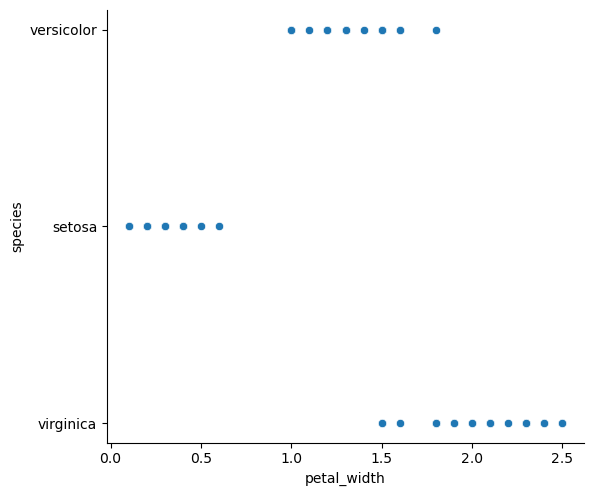

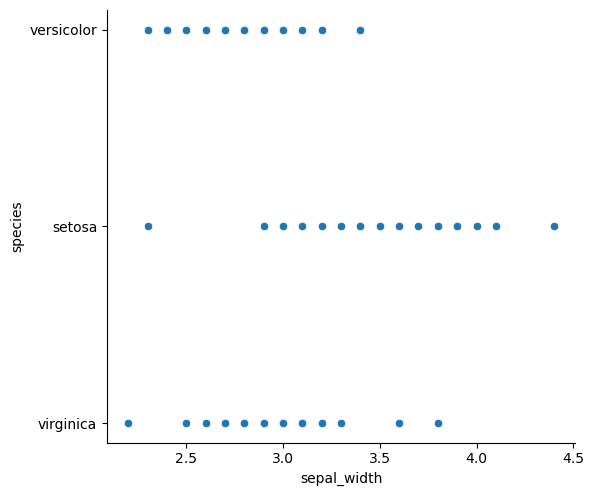

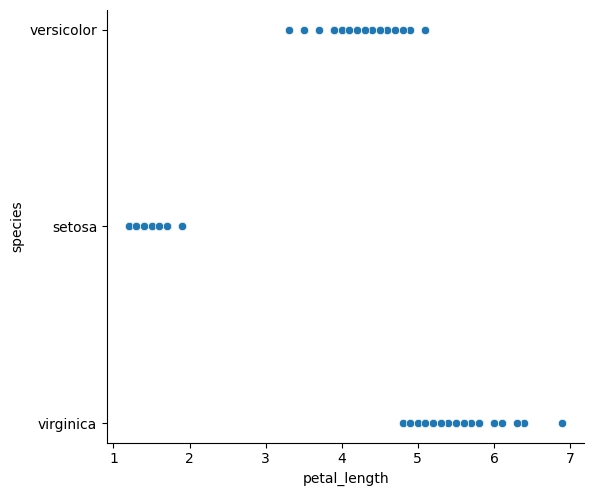

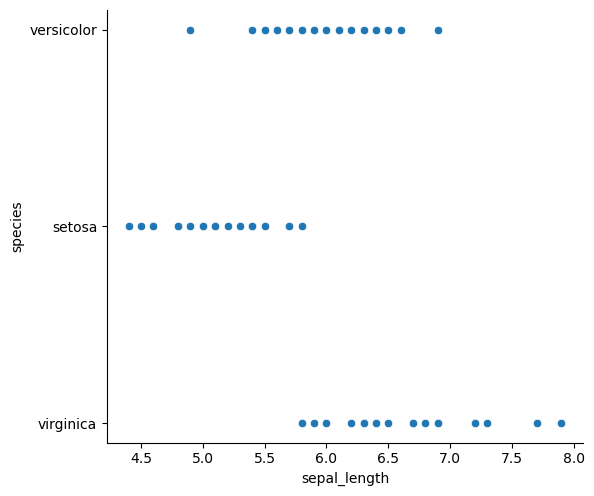

In [63]:
sns.pairplot(data=train_iris,x_vars='petal_width',y_vars='species',height=5, aspect=1.2)
sns.pairplot(data=train_iris,x_vars='sepal_width',y_vars='species',height=5, aspect=1.2)
sns.pairplot(data=train_iris,x_vars='petal_length',y_vars='species',height=5, aspect=1.2)
sns.pairplot(data=train_iris,x_vars='sepal_length',y_vars='species',height=5, aspect=1.2)

### Part III
- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
- What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

Answers:\
In regards to combining columns, there should a stand alone column 'no_internet_service' rather than creating a third value in all the other columns. Those values should be exclusively binary.

In [132]:
telco = acquire.get_telco_data('telco_churn')
telco = prep_telco(telco)
telco_train, telco_test, telco_validate = splitter(telco, target='churn')
telco_train

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_No phone service,multiple_lines_Yes,online_security_Yes,online_backup_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,device_protection_Yes
5325,4992-LTJNE,Male,0,Yes,Yes,72,Yes,Yes,1,Yes,No,No,No,3,No,3,55.30,3983.60,No,DSL,Bank transfer (automatic),Two year,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
3774,7395-XWZOY,Male,0,No,No,20,No,No phone service,1,Yes,Yes,Yes,No,1,Yes,4,55.00,1165.55,No,DSL,Credit card (automatic),Month-to-month,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1
4374,9108-EJFJP,Female,0,Yes,No,1,Yes,No,1,Yes,Yes,No,No,1,Yes,2,53.55,53.55,No,DSL,Mailed check,Month-to-month,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2641,4295-YURET,Female,1,Yes,Yes,56,Yes,No,1,Yes,No,Yes,Yes,3,Yes,4,72.60,4084.35,No,DSL,Credit card (automatic),Two year,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0
2980,5223-UZAVK,Male,0,No,No,64,Yes,No,2,Yes,Yes,Yes,Yes,2,Yes,4,100.30,6603.80,No,Fiber optic,Credit card (automatic),One year,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,7660-HDPJV,Female,0,No,No,1,Yes,No,2,No,No,No,No,1,Yes,1,69.20,69.20,Yes,Fiber optic,Electronic check,Month-to-month,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
356,0523-VNGTF,Female,1,No,No,52,No,No phone service,1,No,Yes,Yes,No,1,Yes,1,50.50,2566.30,No,DSL,Electronic check,Month-to-month,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,1
2128,3058-HJCUY,Male,0,Yes,Yes,41,Yes,Yes,2,No,No,Yes,Yes,2,Yes,1,102.60,4213.35,Yes,Fiber optic,Electronic check,One year,1,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1
3563,6818-DJXAA,Female,0,No,Yes,10,Yes,No,2,No,No,Yes,No,1,Yes,1,91.10,964.35,No,Fiber optic,Electronic check,Month-to-month,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1


In [134]:
telco_train.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_No phone service,multiple_lines_Yes,online_security_Yes,online_backup_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,device_protection_Yes
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.156480,32.466143,1.883338,1.697185,2.305351,64.389716,2274.399366,0.495308,0.308902,0.909206,0.512047,0.595993,0.265280,0.090794,0.429876,0.283033,0.336039,0.207203,0.335531,0.230789,0.209739,0.243723,0.281004,0.383972,0.389044,0.347198
std,0.363356,24.662765,0.745413,0.835908,1.139258,30.254533,2268.678110,0.500041,0.462099,0.287352,0.499918,0.490761,0.441538,0.287352,0.495121,0.450530,0.472412,0.405353,0.472236,0.421391,0.407174,0.429382,0.449547,0.486413,0.487595,0.476140
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,34.100000,401.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,2.000000,1.000000,2.000000,70.200000,1390.600000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,2.000000,2.000000,3.000000,89.825000,3770.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.650000,8564.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
vars=[str('partner'),'tenure','contract_type']

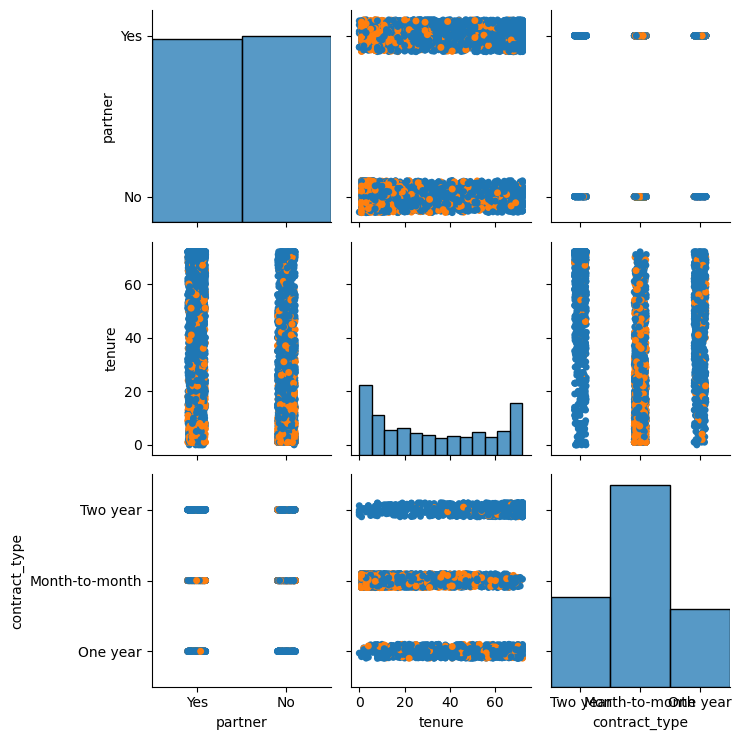

In [136]:
g = sns.PairGrid(telco_train, hue='churn', vars=vars)
g.map_diag(sns.histplot,hue=None)
g.map_offdiag(sns.stripplot)
plt.show()

#### Null $H_0$: There is no relationship between contract type and churn
#### Null $H_a$: There is a relationship between contract type and churn

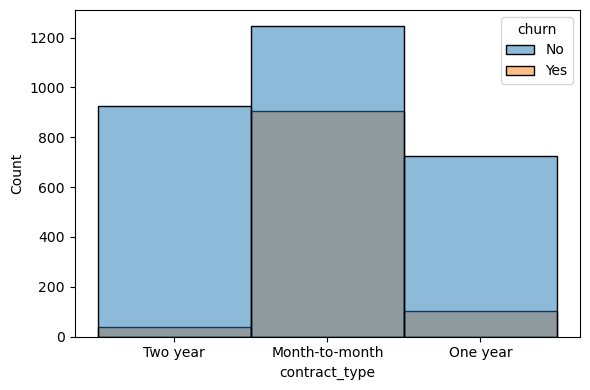

In [137]:
# visualizing relationship between customer type and churn
plt.rcParams["figure.figsize"] = [6.00, 4]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data=telco_train,x='contract_type',hue='churn')
plt.show()

In [138]:
# testing statistical relationship between contract types with chi2 function
observed = pd.crosstab(telco_train['contract_type'],telco['churn'])
a = .05
chi2,p,degf,expected = stats.chi2_contingency(observed)

if p < a:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

We reject the null hypothesis


### Conclusion:
Most customers that churn will have a month to month contract.

#### Null $H_0$: There is not a relationship between monthly <s>total</s> charges and churn
#### Null $H_a$: There is a relationship between contract type and churn

<Axes: xlabel='tenure', ylabel='total_charges'>

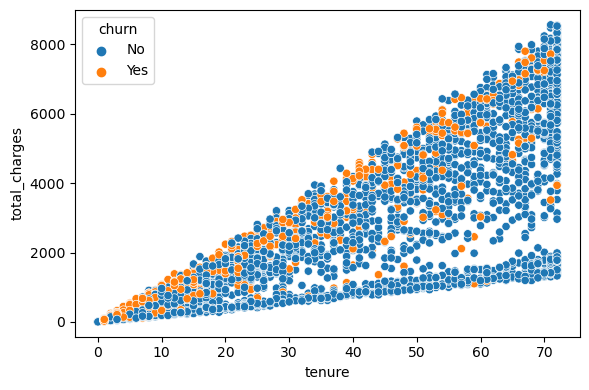

In [139]:
sns.scatterplot(data=telco_train,x='tenure', y='total_charges',hue='churn')

<Axes: xlabel='monthly_charges', ylabel='Count'>

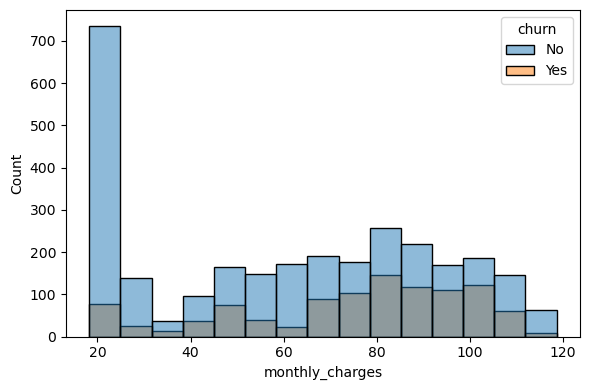

In [140]:
sns.histplot(data=telco_train, x='monthly_charges',hue='churn')